# Buffer Stock Model

# Setup

In [22]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt


# load the BufferStockModel module
from BufferStockModel import BufferStockModelClass

# for timing
from consav.misc import elapsed

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
nb.set_num_threads(1) # use a single thread for clarity

# First Example

In [24]:
model_negm = BufferStockModelClass(name='baseline',par={'solmethod':'egm'})

In [25]:
model_negm.solve()

 t = 59 solved in 1.1 secs
 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 58 solved in 5.3 secs (w: 3.4 secs)
 t = 58 solved in 0.5 secs (w: 0.5 secs)
 t = 58 solved in 0.5 secs (w: 0.5 secs)
 t = 57 solved in 0.5 secs (w: 0.5 secs)
 t = 57 solved in 0.5 secs (w: 0.5 secs)
 t = 57 solved in 0.5 secs (w: 0.5 secs)
 t = 56 solved in 0.5 secs (w: 0.5 secs)
 t = 56 solved in 0.5 secs (w: 0.5 secs)
 t = 56 solved in 0.5 secs (w: 0.5 secs)
 t = 55 solved in 0.5 secs (w: 0.5 secs)
 t = 55 solved in 0.5 secs (w: 0.5 secs)
 t = 55 solved in 0.5 secs (w: 0.5 secs)
 t = 54 solved in 0.5 secs (w: 0.5 secs)
 t = 54 solved in 0.5 secs (w: 0.5 secs)
 t = 54 solved in 0.5 secs (w: 0.5 secs)
 t = 53 solved in 0.5 secs (w: 0.5 secs)
 t = 53 solved in 0.5 secs (w: 0.5 secs)
 t = 53 solved in 0.5 secs (w: 0.5 secs)
 t = 52 solved in 0.5 secs (w: 0.5 secs)
 t = 52 solved in 0.5 secs (w: 0.5 secs)
 t = 52 solved in 0.5 secs (w: 0.5 secs)
 t = 51 solved in 0.5 secs (w: 0.5 secs)
 t = 51 solved in

In [26]:
model_negm.simulate()

model simulated in 2.0 secs


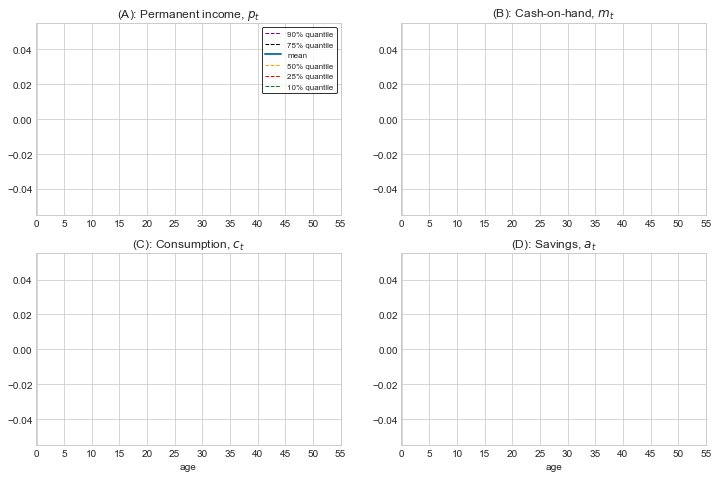

In [27]:
model_negm.lifecycle()

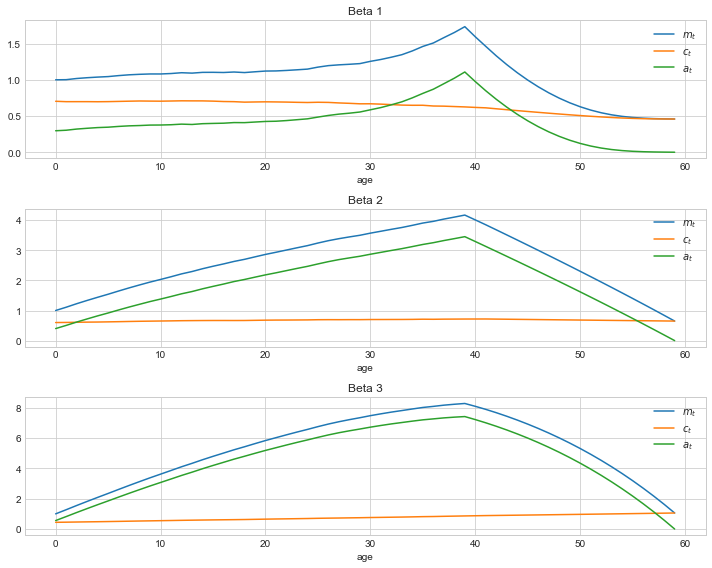

In [28]:
# a. unpack
par = model_negm.par
sim = model_negm.sim

# b. figure
fig, axs = plt.subplots(len(par.Betas), 1, figsize=(10, 8))

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

age = np.arange(par.T)

for b in range(len(par.Betas)):  # loop over beta dimension
    ax = axs[b]  # specify the current subplot

    for simvar, simvarlatex in simvarlist:
        # get simulation data
        simdata = getattr(sim, simvar)

        # calculate mean over individual dimension for each beta
        mean_data = np.mean(simdata[:, b, :], axis=1)

        # plot mean data
        ax.plot(age, mean_data, label=simvarlatex)

    ax.grid(True)
    ax.set_xlabel('age')
    ax.set_title(f'Beta {b+1}')
    ax.legend()

# adjust layout for better visualization
plt.tight_layout()
plt.show()

In [29]:
model_negm.simulate_rand()

model simulated in 2.0 secs


Text(0.5, 0, 'age')

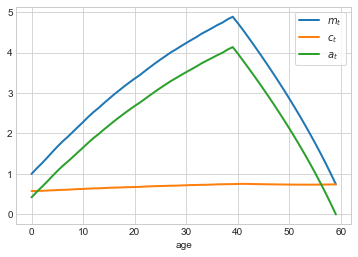

In [30]:
# a. unpack
par = model_negm.par
sim = model_negm.sim

# b. figure
fig = plt.figure()

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

age = np.arange(par.T)
ax = fig.add_subplot(1,1,1)

for simvar,simvarlatex in simvarlist:

    simdata = getattr(sim,simvar+'_rand')
    ax.plot(age,np.mean(simdata,axis=1),lw=2,label=simvarlatex)

ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age')

## Marginal Propensity to Consume

### MPC for Different Cohorts

In [38]:
par = model_negm.par
sim = model_negm.sim
sol = model_negm.sol

In [68]:
# allocate memory
c0 = np.zeros(shape=(par.T,len(par.Betas), len(par.grid_m)))
c1 = np.zeros(shape=(par.T,len(par.Betas), len(par.grid_m)))
mpc = np.zeros(shape=(par.T,len(par.Betas), len(par.grid_m)))

In [69]:
m_grid =  nonlinspace(0,20,par.Nm,1.1) 

In [70]:
from consav import linear_interp

In [71]:
p_bar = np.mean(sim.p,axis=2)

In [72]:
p_bar.shape

(60, 3)

In [101]:
mpc_eps = 0.00749

In [139]:
for t in range(par.T):
    for b in range(len(par.Betas)):
        for i,m in enumerate(par.grid_m):
            c0[t,b,i] = linear_interp.interp_2d(par.grid_p,par.grid_m,sol.c[t,b],p_bar[t,b],m)
            c1[t,b,i] = linear_interp.interp_2d(par.grid_p,par.grid_m,sol.c[t,b],p_bar[t,b],m+mpc_eps)
            mpc[t,b,i] = (c1[t,b,i]-c0[t,b,i])/mpc_eps

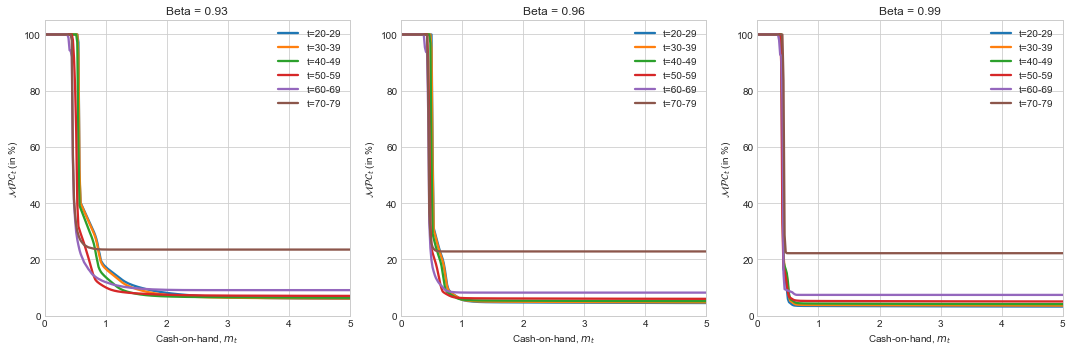

In [175]:
fig, axs = plt.subplots(1, len(par.Betas), figsize=(15, 5))

for b in range(len(par.Betas)):
    for t in np.arange(0,par.T,10):
        axs[b].plot(par.grid_m, np.mean(mpc[t:t+9,b,:]*100,axis=0), label='t={}-{}'.format(t+par.Tmin,t+par.Tmin+9), lw=2.3)
        axs[b].set_xlim([0, 5])  # sets x-axis limit
        axs[b].set_ylim([0, 105])  # sets y-axis limit
        axs[b].set_title(f'Beta = {par.Betas[b].round(2)}')  # sets title for each subplot
        axs[b].set_xlabel('Cash-on-hand, $m_t$')
        axs[b].set_ylabel('$\mathcal{MPC}_t$ (in %)') 
        axs[b].legend() 

plt.tight_layout()
plt.show()

#### Simulated MPC

### Transitory Anticipated Tax Increase

In [64]:
# simulate Marshall elasticity in the first period
model_negm_trans10pct = model_negm.copy()
model_negm_trans10pct.par.tax_rate_vec[20] = model_negm.par.tax_rate_vec[20]*1.1

In [65]:
# ensuring tax has hikened
model_negm_trans10pct.par.tax_rate_vec

array([0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.33, 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 ])

In [66]:
model_negm_trans10pct.solve()
model_negm_trans10pct.simulate()
model_negm_trans10pct.simulate_rand()

 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 58 solved in 0.5 secs (w: 0.5 secs)
 t = 58 solved in 0.5 secs (w: 0.5 secs)
 t = 58 solved in 0.5 secs (w: 0.5 secs)
 t = 57 solved in 0.5 secs (w: 0.5 secs)
 t = 57 solved in 0.5 secs (w: 0.5 secs)
 t = 57 solved in 0.5 secs (w: 0.5 secs)
 t = 56 solved in 0.5 secs (w: 0.5 secs)
 t = 56 solved in 0.5 secs (w: 0.5 secs)
 t = 56 solved in 0.5 secs (w: 0.5 secs)
 t = 55 solved in 0.5 secs (w: 0.5 secs)
 t = 55 solved in 0.5 secs (w: 0.5 secs)
 t = 55 solved in 0.5 secs (w: 0.5 secs)
 t = 54 solved in 0.5 secs (w: 0.5 secs)
 t = 54 solved in 0.5 secs (w: 0.5 secs)
 t = 54 solved in 0.5 secs (w: 0.5 secs)
 t = 53 solved in 0.5 secs (w: 0.5 secs)
 t = 53 solved in 0.5 secs (w: 0.5 secs)
 t = 53 solved in 0.5 secs (w: 0.5 secs)
 t = 52 solved in 0.5 secs (w: 0.5 secs)
 t = 52 solved in 0.5 secs (w: 0.5 secs)
 t = 52 solved in 0.5 secs (w: 0.5 secs)
 t = 51 solved in 0.5 secs (w: 0.5 secs)
 t = 51 solved in

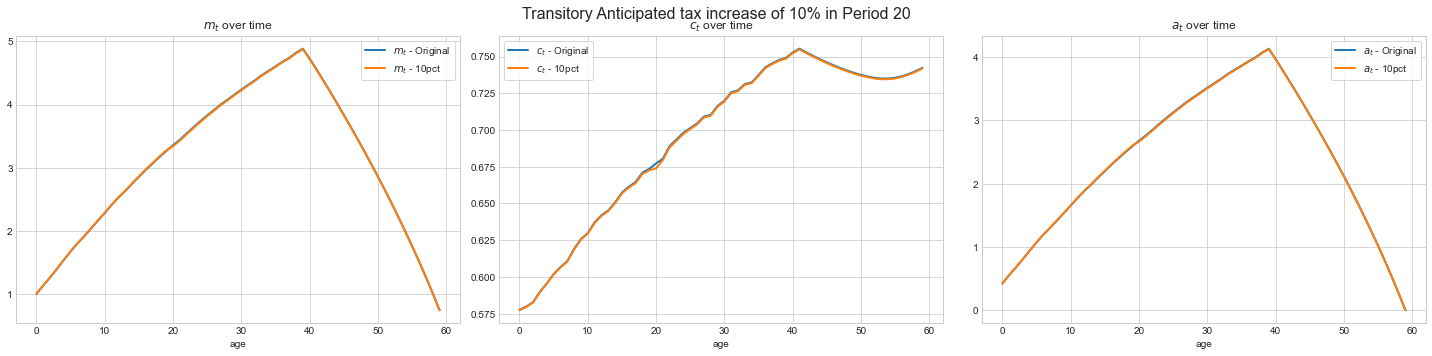

In [73]:
# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_trans10pct = model_negm_trans10pct.sim

# b. figure
fig, axs = plt.subplots(1, len(simvarlist), figsize=(20, 5))

# add a title over the entire figure
fig.suptitle("Transitory Anticipated tax increase of 10% in Period 20", fontsize=16)

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

age = np.arange(par.T)

for i, (simvar,simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim,simvar+'_rand')
    simdata_trans10pct = getattr(sim_trans10pct,simvar+'_rand')
    axs[i].plot(age,np.mean(simdata,axis=1),lw=2,label=f'{simvarlatex} - Original')
    axs[i].plot(age,np.mean(simdata_trans10pct,axis=1),lw=2,label=f'{simvarlatex} - 10pct')

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('age')
    axs[i].set_title(f'{simvarlatex} over time')

plt.tight_layout()
# Adjust the layout so that title does not overlap with the top plot
plt.subplots_adjust(top=0.9)
plt.show()

### Permanent Anticipated Tax Increase

In [69]:
# simulate Marshall elasticity in the first period
model_negm_10pct = model_negm.copy()
model_negm_10pct.par.tax_rate_vec[20:] = model_negm.par.tax_rate_vec[20:]*1.1

In [70]:
# ensuring tax has hikened
model_negm_10pct.par.tax_rate_vec

array([0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33])

In [71]:
model_negm_10pct.solve()
model_negm_10pct.simulate()
model_negm_10pct.simulate_rand()

 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 58 solved in 0.5 secs (w: 0.5 secs)
 t = 58 solved in 0.5 secs (w: 0.5 secs)
 t = 58 solved in 0.5 secs (w: 0.5 secs)
 t = 57 solved in 0.5 secs (w: 0.5 secs)
 t = 57 solved in 0.5 secs (w: 0.5 secs)
 t = 57 solved in 0.5 secs (w: 0.5 secs)
 t = 56 solved in 0.5 secs (w: 0.5 secs)
 t = 56 solved in 0.5 secs (w: 0.5 secs)
 t = 56 solved in 0.5 secs (w: 0.5 secs)
 t = 55 solved in 0.5 secs (w: 0.5 secs)
 t = 55 solved in 0.5 secs (w: 0.5 secs)
 t = 55 solved in 0.5 secs (w: 0.5 secs)
 t = 54 solved in 0.5 secs (w: 0.5 secs)
 t = 54 solved in 0.5 secs (w: 0.5 secs)
 t = 54 solved in 0.5 secs (w: 0.5 secs)
 t = 53 solved in 0.5 secs (w: 0.5 secs)
 t = 53 solved in 0.5 secs (w: 0.5 secs)
 t = 53 solved in 0.5 secs (w: 0.5 secs)
 t = 52 solved in 0.6 secs (w: 0.6 secs)
 t = 52 solved in 0.5 secs (w: 0.5 secs)
 t = 52 solved in 0.5 secs (w: 0.5 secs)
 t = 51 solved in 0.5 secs (w: 0.5 secs)
 t = 51 solved in

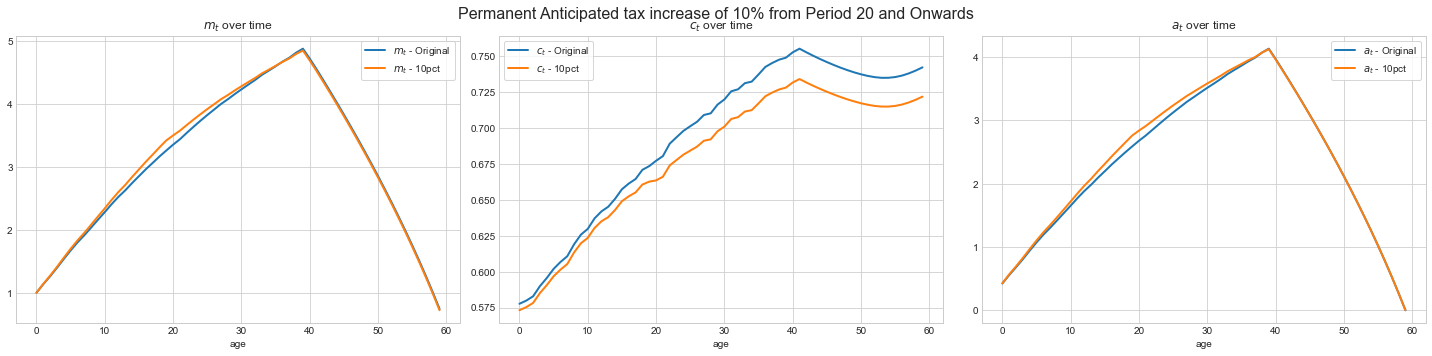

In [72]:
# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_10pct = model_negm_10pct.sim

# b. figure
fig, axs = plt.subplots(1, len(simvarlist), figsize=(20, 5))

# add a title over the entire figure
fig.suptitle("Permanent Anticipated tax increase of 10% from Period 20 and Onwards", fontsize=16)

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

age = np.arange(par.T)

for i, (simvar,simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim,simvar+'_rand')
    simdata_10pct = getattr(sim_10pct,simvar+'_rand')
    axs[i].plot(age,np.mean(simdata,axis=1),lw=2,label=f'{simvarlatex} - Original')
    axs[i].plot(age,np.mean(simdata_10pct,axis=1),lw=2,label=f'{simvarlatex} - 10pct')

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('age')
    axs[i].set_title(f'{simvarlatex} over time')

plt.tight_layout()
# Adjust the layout so that title does not overlap with the top plot
plt.subplots_adjust(top=0.9)
plt.show()

### Uanticipated Tax Increase

In [114]:
# copy the original model
model_unanticipated10pt = model_negm.copy()

In [115]:
# 3. Replace the periods after 20 from the old_tax simulation with the new_tax simulation
for var in ['m', 'c', 'a']:
    sim_old = getattr(model_negm.sim, var+'_rand')
    sim_new = getattr(model_negm_10pct.sim, var+'_rand')
    sim_combined = np.copy(sim_old)  # Create a copy of the old simulation
    sim_combined[20:] = sim_new[20:]  # Replace the periods after 20 with the new simulation

    # Set the combined simulation in the original model
    setattr(model_unanticipated10pt.sim, f'{var}_rand', sim_combined)

**Checking They Jump to Correct (New) Optimal Path**

In [119]:
model_negm.sim.c_rand[10,0]

0.30291422148606895

In [120]:
model_unanticipated10pt.sim.c_rand[10,0]

0.30291422148606895

In [124]:
model_unanticipated10pt.sim.c_rand[30,0]

0.45235925619749867

In [125]:
model_negm_10pct.sim.c_rand[30,0]

0.45235925619749867

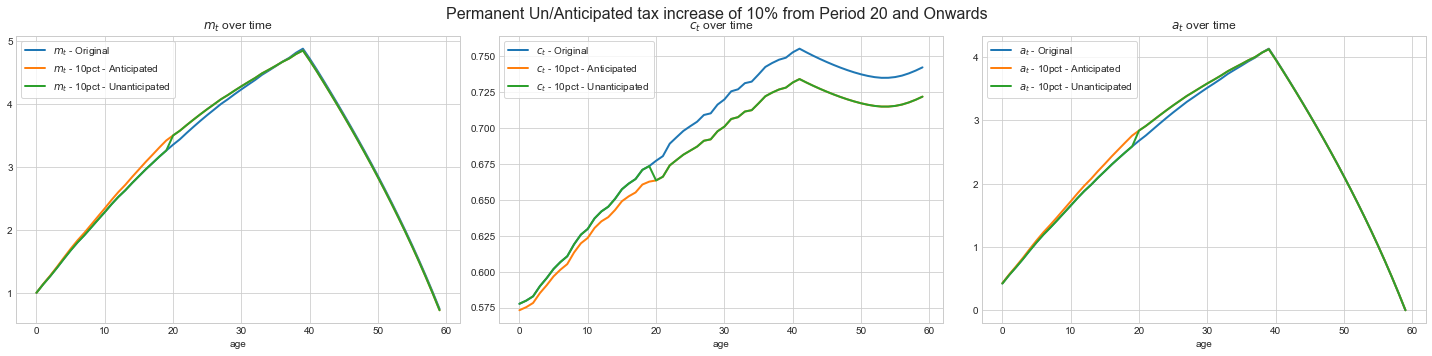

In [126]:
# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_10pct = model_negm_10pct.sim
sim_unanticipated = model_unanticipated10pt.sim

# b. figure
fig, axs = plt.subplots(1, len(simvarlist), figsize=(20, 5))

# add a title over the entire figure
fig.suptitle("Permanent Un/Anticipated tax increase of 10% from Period 20 and Onwards", fontsize=16)

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

age = np.arange(par.T)

for i, (simvar,simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim, simvar+'_rand')
    simdata_10pct = getattr(sim_10pct, simvar+'_rand')
    simdata_unanticipated = getattr(sim_unanticipated, simvar+'_rand')  # data from combined model

    axs[i].plot(age, np.mean(simdata, axis=1), lw=2, label=f'{simvarlatex} - Original')
    axs[i].plot(age, np.mean(simdata_10pct, axis=1), lw=2, label=f'{simvarlatex} - 10pct - Anticipated')
    axs[i].plot(age, np.mean(simdata_unanticipated, axis=1), lw=2, label=f'{simvarlatex} - 10pct - Unanticipated')  # plot combined data

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('age')
    axs[i].set_title(f'{simvarlatex} over time')

plt.tight_layout()
# Adjust the layout so that title does not overlap with the top plot
plt.subplots_adjust(top=0.9)
plt.show()

In [16]:
model = BufferStockModelClass(name='baseline',par={'solmethod':'vfi'})

In [18]:
model.solve()

 t = 4 solved in 0.9 secs
 t = 4 solved in 0.0 secs
 t = 4 solved in 0.0 secs
 t = 3 solved in 35.2 secs (w: 0.0 secs)
 t = 3 solved in 30.9 secs (w: 0.0 secs)
 t = 3 solved in 31.1 secs (w: 0.0 secs)
 t = 2 solved in 31.0 secs (w: 0.0 secs)
 t = 2 solved in 31.0 secs (w: 0.0 secs)
 t = 2 solved in 32.4 secs (w: 0.0 secs)
 t = 1 solved in 31.9 secs (w: 0.0 secs)
 t = 1 solved in 31.8 secs (w: 0.0 secs)
 t = 1 solved in 32.1 secs (w: 0.0 secs)
 t = 0 solved in 31.8 secs (w: 0.0 secs)
 t = 0 solved in 31.8 secs (w: 0.0 secs)
 t = 0 solved in 31.3 secs (w: 0.0 secs)


In [23]:
model.sol.c[0,1,:,:]

array([[9.95975344e-07, 5.58473053e-04, 2.07132795e-03, ...,
        4.12598957e+00, 4.16704267e+00, 4.20084574e+00],
       [9.95975344e-07, 5.31767517e-03, 1.08664389e-02, ...,
        4.13829432e+00, 4.17551589e+00, 4.21202578e+00],
       [9.95975344e-07, 1.00942512e-02, 2.19686766e-02, ...,
        4.15008226e+00, 4.18539474e+00, 4.22252912e+00],
       ...,
       [9.95975344e-07, 1.76150957e-02, 3.52460592e-02, ...,
        1.12670501e+01, 1.12964800e+01, 1.13355633e+01],
       [9.95975344e-07, 1.76150957e-02, 3.52460592e-02, ...,
        1.13475445e+01, 1.13747552e+01, 1.14132237e+01],
       [9.95975344e-07, 1.76150957e-02, 3.52460592e-02, ...,
        1.14326267e+01, 1.14645250e+01, 1.14986450e+01]])

In [24]:
model.simulate()

model simulated in 0.0 secs


In [7]:
model_egm.par.Betas

array([0.98, 0.98, 0.98])

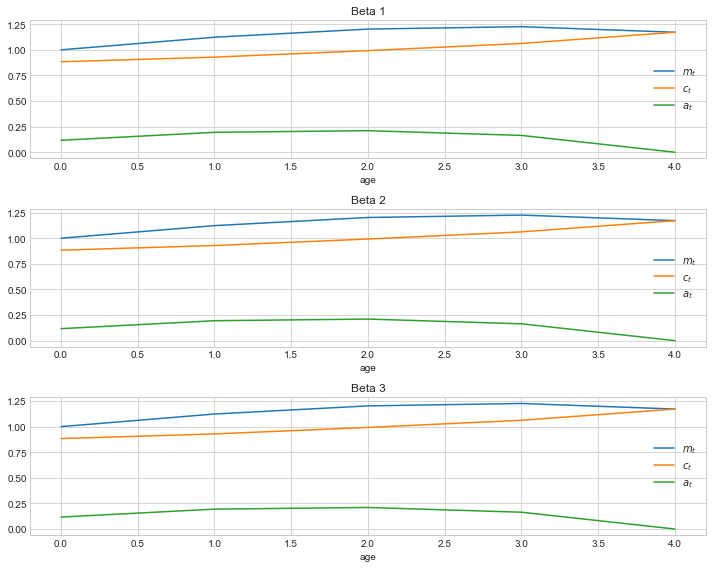

In [28]:
# a. unpack
par = model.par
sim = model.sim

# b. figure
fig, axs = plt.subplots(len(par.Betas), 1, figsize=(10, 8))

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

age = np.arange(par.T)

for b in range(len(par.Betas)):  # loop over beta dimension
    ax = axs[b]  # specify the current subplot

    for simvar, simvarlatex in simvarlist:
        # get simulation data
        simdata = getattr(sim, simvar)

        # calculate mean over individual dimension for each beta
        mean_data = np.mean(simdata[:, b, :], axis=1)

        # plot mean data
        ax.plot(age, mean_data, label=simvarlatex)

    ax.grid(True)
    ax.set_xlabel('age')
    ax.set_title(f'Beta {b+1}')
    ax.legend()

# adjust layout for better visualization
plt.tight_layout()
plt.show()

heterogenous

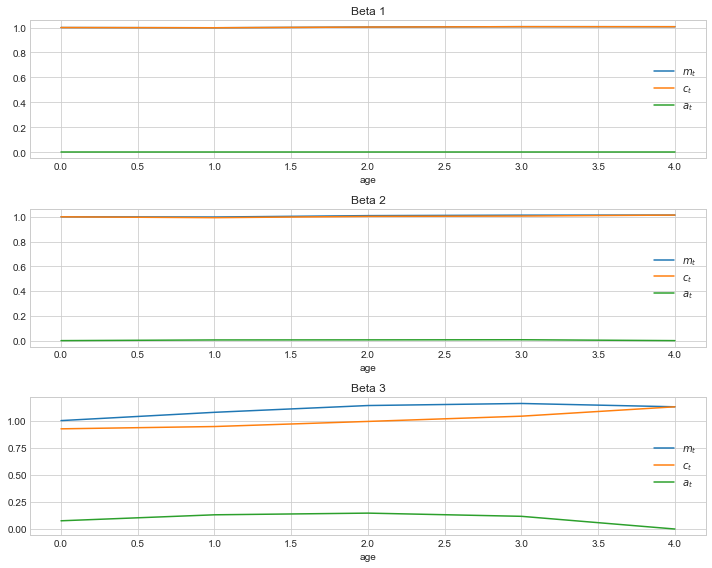

In [13]:
# a. unpack
par = model.par
sim = model.sim

# b. figure
fig, axs = plt.subplots(len(par.Betas), 1, figsize=(10, 8))

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

age = np.arange(par.T)

for b in range(len(par.Betas)):  # loop over beta dimension
    ax = axs[b]  # specify the current subplot

    for simvar, simvarlatex in simvarlist:
        # get simulation data
        simdata = getattr(sim, simvar)

        # calculate mean over individual dimension for each beta
        mean_data = np.mean(simdata[:, b, :], axis=1)

        # plot mean data
        ax.plot(age, mean_data, label=simvarlatex)

    ax.grid(True)
    ax.set_xlabel('age')
    ax.set_title(f'Beta {b+1}')
    ax.legend()

# adjust layout for better visualization
plt.tight_layout()
plt.show()

## Load/save

**Delete** the model:

In [4]:
del model

**Load** the model again:

In [5]:
model_loaded = BufferStockModelClass(name='baseline',load=True)

**Plot** the consumption function in period $t=0$:

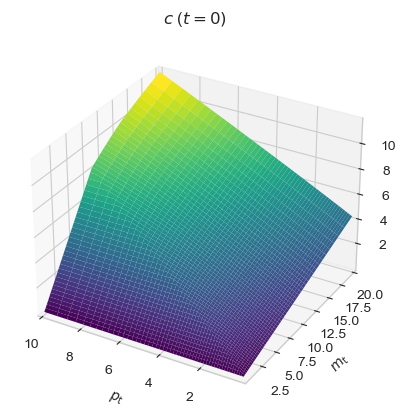

In [6]:
model_loaded.consumption_function(t=0)

**Copy** the model:

In [7]:
model_copy = model_loaded.copy() # name can be specified
print(model_copy.name)

baseline_copy


**Plot** the life-cycle profiles:

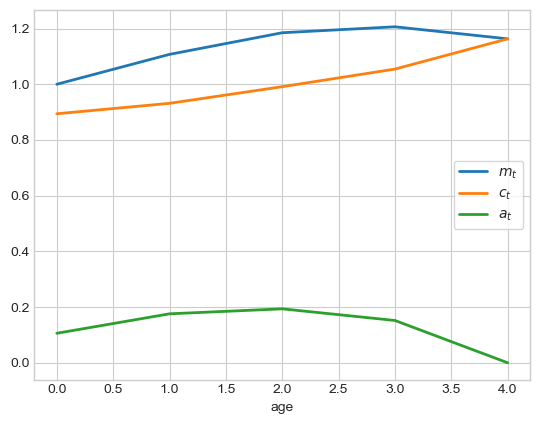

In [8]:
model_copy.lifecycle()

**Plot** an interactive version of the consumption function:

In [ ]:
model_loaded.consumption_function_interact()

# Timings

**Time** the various solution methods and show the importance of the optimized computation of $q_t(p_t,a_t)$ in EGM (i.e. setting `do_simple_w = False`).

In [ ]:
t0 = time.time()
model = BufferStockModelClass(name='')
print(f'time to setup: {elapsed(t0)}')

In [ ]:
for solmethod in ['nvfi','egm','vfi']:    
    for do_simple_w in [True,False]:
        
        if solmethod == 'vfi' and do_simple_w: continue # skip this
    
        print(f'{solmethod}',end='')        
        
        if not solmethod == 'vfi':
            print(f' (do_simple_w = {do_simple_w})')
        else:
            print('')
        
        # a. change solution method
        model.par.solmethod = solmethod
        model.par.do_simple_w = do_simple_w
        model.par.do_print = False
    
        # b. test run 
        t0 = time.time()
        model.solve()
        model.par.do_print = True
        print(f'time in test run: {elapsed(t0)}')

        # c. final run
        t0 = time.time()
        model.solve()
        print(f'time in final run: {elapsed(t0)} [checksum: {model.checksum():.8f}]')
        print('')
        

## Test Parallelization

In [ ]:
threads_list = [x for x in np.arange(1,nb.config.NUMBA_NUM_THREADS+1) if x in [1,4,8] or x%8 == 0]

In [ ]:
solmethod = 'egm'
for do_simple_w in [False,True]:
    
    print(f'{solmethod} (do_simple_w = {do_simple_w}) ')
    
    for threads in threads_list:

        nb.set_num_threads(threads)
        
        # a. change solution method
        model.par.solmethod = solmethod
        model.par.do_simple_w = do_simple_w
        model.par.do_print = False

        # b. run
        t0 = time.time()
        model.solve()
        print(f' time to solve with {threads:2d} threads: {elapsed(t0)} [checksum: {model.checksum():.8f}]')
    
    print('')


**Conclusion:** Numba is not always parallizing that well. And using too many threads can even be harmful.